## Final Project Submission

Please fill out:
* Student name: Nazra Joyce Nyangwara
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Everlyne Asiko
* Blog post URL:


# Introduction

Microsoft sees all the big companies creating original video content and wants to get in on the fun. They have decided to create a new movie studio, but they know nothing about creating movies. As they explore options for what type of films to create, they are interested in exploring what types of films are currently doing the best at the box office.

My project aims to analyse what types of films are currently doing the best at the box office. I will utilize data from the following datasets:
* bom.movie_gross.csv.gz
* tmdb.movies.csv.gz
* tn.movie_budgets.csv.gz

In my analysis, I will focus on financial success (in terms of revenue) as the measure of a movie's success and compare the variables listed below relative to financial performance:
* Genre
* Production budget
* Studio
* Timing of release

## Datasets
To get started, I will import the relevant libraries to facilitate my analysis. Then, I will connect to and analyse the databases highlighted above based on the identified metrics.

In [1]:
import pandas as pd #import the pandas library with the alias pd so that it can be referred to easily later in the code
import numpy as np #import the numpy library with the alias pd so that it can be referred to easily later in the code
import csv #imports the built-in csv module in Python to read and write CSV (Comma Separated Values) files
import matplotlib.pyplot as plt #to create and customize data visualizations in Python
%matplotlib inline #to display visualizations directly in the notebook below the cell that created them
import ast #to allow for efficient analysis and manipulation of source code

### bom.movie_gross.csv.gz

In [2]:
#name the dataset movie_gross and open it to read the contents of the csv file
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz", index_col =0)
#display the first 10 rows of the dataset
movie_gross.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [3]:
movie_gross.info() #display a summary of the contents of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [4]:
#check for the presence of missing values and how many they are in each column
movie_gross.isnull().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From this initial analysis, I deduce that this dataset has 4 columns, each of which ought to have 3387 entries. Thus, it is already evident that some columns have missing values. Further analysis reveals 5 missing values in the studio column, 28 missing values in the domestic_gross column, and 1350 missing values in the foreign_gross column. I also deduce that the foreign_gross column is encoded as categorical data(strings) while I would expect it to be continuous data. I will first change the data type for the foreign_gross column from object to float. However, before diving into correcting the other anomalies I have identified in the data, I will first examine the other datasets for any common features with this particular dataset.

In [5]:
#Remove any commas in the foreign_gross data before converting it from object to float data type
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'].str.replace(',', '').str.replace('$', ''))

In [6]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


Now that the data types for all the columns are as I expect them to be, I will proceed to the next dataset and repeat the same process applied to this first dataset.

### tn.movie_budgets.csv.gz

In [7]:
#assign the name movie_budgets to the dataset and display the first 10 rows
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
movie_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"


In [8]:
movie_budgets.info() #display a summary of the movie_budgets dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


I deduce that this second dataset contains 5 columns, each of which ought to contain 5782 entries. A glance of the columns indicates that there are no missing values. However, while I expect the data type for the production budget, domestic gross, and worldwide gross columns to be continuous data , it appears that it has been input as categorical data. I will correct this to reflect the appropriate data type.

In [9]:
#Remove any commas in the data before converting it from object to float data type
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'].str.replace('$','').str.replace(',',''))
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'].str.replace('$','').str.replace(',',''))
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'].str.replace('$','').str.replace(',',''))
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [10]:
movie_budgets.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
9,"Nov 17, 2017",Justice League,300000000,229024295,655945209


It is evident that the first two datasets have some columns in common including the movie titles(though labeled differently in each dataset) and domestic gross. In that case, I will merge the two datasets based on their common columns.

In [11]:
#reset the title index in the movie_gross dataset to a column and rename it to movie to align with the movie column
#in the movie_budgets dataset
movie_gross = movie_gross.rename_axis('movie').reset_index()
movie_gross.columns = ['movie', 'studio', 'domestic_gross', 'foreign_gross', 'year']
movie_gross.head()

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [12]:
#merge the datasets based on the movie column and name the new dataset merged_df
merged_df = pd.merge(movie_gross, movie_budgets, on='movie')
merged_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,"Jun 18, 2010",200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000.0,2010,"Jul 16, 2010",160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,"May 21, 2010",165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,"Jun 30, 2010",68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,"May 7, 2010",170000000,312433331,621156389


Next, I want to merge the domestic gross columns. However, merging the movie columns has created an additional domestic gross column. Comparison of the two domestic gross columns reveals that domestic_gross_x contains the same figures as domestic_gross_y except that domestic_gross_x is rounded off to the nearest 100,000. In that case, I will first round off domestic_gross_y to align with domestic_gross-x and then merge the two columns. Furthermore, I will also round the worldwide_gross column for uniformity of the dataset.

In [13]:
#round off to the nearest 100,000
merged_df['domestic_gross_y'] = merged_df['domestic_gross_y'].round(-5)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].round(-5)
#merge columns
merged_df['domestic_gross'] = merged_df['domestic_gross_x'].fillna(merged_df['domestic_gross_y'])
# drop original columns
merged_df.drop(['domestic_gross_x', 'domestic_gross_y'], axis=1, inplace=True)
merged_df.head()

,movie,studio,foreign_gross,year,release_date,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,BV,652000000.0,2010,"Jun 18, 2010",200000000,1068900000,415000000.0
1,Inception,WB,535700000.0,2010,"Jul 16, 2010",160000000,835500000,292600000.0
2,Shrek Forever After,P/DW,513900000.0,2010,"May 21, 2010",165000000,756200000,238700000.0
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010,"Jun 30, 2010",68000000,706100000,300500000.0
4,Iron Man 2,Par.,311500000.0,2010,"May 7, 2010",170000000,621200000,312400000.0


Next, it appears that the data contained in the 'year' column has already been captured in the release_date column. Thus, I will drop the year column.

In [14]:
merged_df.drop('year', axis=1, inplace=True) #drops year column
merged_df.head()

,movie,studio,foreign_gross,release_date,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,BV,652000000.0,"Jun 18, 2010",200000000,1068900000,415000000.0
1,Inception,WB,535700000.0,"Jul 16, 2010",160000000,835500000,292600000.0
2,Shrek Forever After,P/DW,513900000.0,"May 21, 2010",165000000,756200000,238700000.0
3,The Twilight Saga: Eclipse,Sum.,398000000.0,"Jun 30, 2010",68000000,706100000,300500000.0
4,Iron Man 2,Par.,311500000.0,"May 7, 2010",170000000,621200000,312400000.0


I can now proceed to the third dataset.

### tmdb.movies.csv.gz

In [15]:
#assign the name movies to the dataset and display the first ten rows
movies = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col =0)
movies.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [16]:
#display a summary of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


This dataset contains no missing values! It has 9 columns each with 26517 entries. The data in each column is encoded as I expect it to be. Moreover, I can deduce that this dataset has in common with the merged_df dataset the movie title, labeled in different columns as original_title and title, and release dates.

In [17]:
#use fillna to replace any missing values in the title column with values from the original_title column
movies['movie'] = movies['title'].fillna(movies['original_title'])
# Drop the original_title and title columns
movies.drop(['original_title', 'title'], axis=1, inplace=True)
movies.head(10)

,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,movie
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,7.7,10788,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,7.7,7610,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,6.8,12368,Iron Man 2
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,7.9,10174,Toy Story
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,8.3,22186,Inception
5,"[12, 14, 10751]",32657,en,26.691,2010-02-11,6.1,4229,Percy Jackson & the Olympians: The Lightning T...
6,"[28, 12, 14, 878]",19995,en,26.526,2009-12-18,7.4,18676,Avatar
7,"[16, 10751, 35]",10193,en,24.445,2010-06-17,7.7,8340,Toy Story 3
8,"[16, 10751, 35]",20352,en,23.673,2010-07-09,7.2,10057,Despicable Me
9,"[16, 28, 35, 10751, 878]",38055,en,22.855,2010-11-04,6.8,3635,Megamind


In [18]:
#change the format of release dates in the movie_budgets dataset to align with the format in the movies dataset 
merged_df["release_date"] = pd.to_datetime(merged_df["release_date"], format="%b %d, %Y").dt.strftime("%Y-%m-%d")
merged_df.head()

,movie,studio,foreign_gross,release_date,production_budget,worldwide_gross,domestic_gross
0,Toy Story 3,BV,652000000.0,2010-06-18,200000000,1068900000,415000000.0
1,Inception,WB,535700000.0,2010-07-16,160000000,835500000,292600000.0
2,Shrek Forever After,P/DW,513900000.0,2010-05-21,165000000,756200000,238700000.0
3,The Twilight Saga: Eclipse,Sum.,398000000.0,2010-06-30,68000000,706100000,300500000.0
4,Iron Man 2,Par.,311500000.0,2010-05-07,170000000,621200000,312400000.0


In [19]:
#create a new dataset, combined_data and merge the common columns in the merded_df dataset and movies dataset
combined_df = pd.merge(movies, merged_df, on=['release_date', 'movie'])
combined_df.head(10)

,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,movie,studio,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,7.7,7610,How to Train Your Dragon,P/DW,277300000.0,165000000,494900000,217600000.0
1,"[12, 28, 878]",10138,en,28.515,2010-05-07,6.8,12368,Iron Man 2,Par.,311500000.0,170000000,621200000,312400000.0
2,"[28, 878, 12]",27205,en,27.920,2010-07-16,8.3,22186,Inception,WB,535700000.0,160000000,835500000,292600000.0
3,"[16, 10751, 35]",20352,en,23.673,2010-07-09,7.2,10057,Despicable Me,Uni.,291600000.0,69000000,543500000,251500000.0
4,"[16, 10751]",38757,en,21.511,2010-11-24,7.5,6407,Tangled,BV,391000000.0,260000000,586500000,200800000.0
5,"[12, 10751, 14]",10140,en,17.382,2010-12-10,6.3,3196,The Chronicles of Narnia: The Voyage of the Da...,Fox,311300000.0,155000000,418200000,104400000.0
6,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,6.3,2703,The A-Team,Fox,100000000.0,110000000,177200000,77200000.0
7,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,4.6,2143,The Last Airbender,Par.,187900000.0,150000000,319700000,131800000.0
8,[18],37799,en,15.889,2010-10-01,7.2,6116,The Social Network,Sony,128000000.0,40000000,224900000,97000000.0
9,"[28, 12, 18]",20662,en,15.444,2010-05-14,6.3,2569,Robin Hood,Uni.,216400000.0,210000000,322500000,105300000.0


In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          1026 non-null   object 
 1   id                 1026 non-null   int64  
 2   original_language  1026 non-null   object 
 3   popularity         1026 non-null   float64
 4   release_date       1026 non-null   object 
 5   vote_average       1026 non-null   float64
 6   vote_count         1026 non-null   int64  
 7   movie              1026 non-null   object 
 8   studio             1026 non-null   object 
 9   foreign_gross      908 non-null    float64
 10  production_budget  1026 non-null   int64  
 11  worldwide_gross    1026 non-null   int64  
 12  domestic_gross     1026 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 112.2+ KB


The new dataset combined_df contains 13 columns, each of which should have 1026 entries. Evidently, the foreign gross column has some missing values.

In [21]:
#find the number of missing values in each column
combined_df.isna().sum()

genre_ids              0
id                     0
original_language      0
popularity             0
release_date           0
vote_average           0
vote_count             0
movie                  0
studio                 0
foreign_gross        118
production_budget      0
worldwide_gross        0
domestic_gross         0
dtype: int64

In [22]:
missing_values = np.round((combined_df['foreign_gross'].isna().sum() / len(combined_df)) * 100, 2) #determines the proportion of 
#missing values in the foreign gross column
print(missing_values) #prints the proportion of missing values

11.5


The proportion of missing values in the foreign_gross column is 11.5 per cent. Since this column contains continuous data, I will impute the median foreign gross to replace the missing values in the column.

In [23]:
#replace the missing values in foreign_gross with the median
combined_df['foreign_gross'] = combined_df['foreign_gross'].fillna(combined_df['foreign_gross'].median())
combined_df.head(10)

,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,movie,studio,foreign_gross,production_budget,worldwide_gross,domestic_gross
0,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,7.7,7610,How to Train Your Dragon,P/DW,277300000.0,165000000,494900000,217600000.0
1,"[12, 28, 878]",10138,en,28.515,2010-05-07,6.8,12368,Iron Man 2,Par.,311500000.0,170000000,621200000,312400000.0
2,"[28, 878, 12]",27205,en,27.920,2010-07-16,8.3,22186,Inception,WB,535700000.0,160000000,835500000,292600000.0
3,"[16, 10751, 35]",20352,en,23.673,2010-07-09,7.2,10057,Despicable Me,Uni.,291600000.0,69000000,543500000,251500000.0
4,"[16, 10751]",38757,en,21.511,2010-11-24,7.5,6407,Tangled,BV,391000000.0,260000000,586500000,200800000.0
5,"[12, 10751, 14]",10140,en,17.382,2010-12-10,6.3,3196,The Chronicles of Narnia: The Voyage of the Da...,Fox,311300000.0,155000000,418200000,104400000.0
6,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,6.3,2703,The A-Team,Fox,100000000.0,110000000,177200000,77200000.0
7,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,4.6,2143,The Last Airbender,Par.,187900000.0,150000000,319700000,131800000.0
8,[18],37799,en,15.889,2010-10-01,7.2,6116,The Social Network,Sony,128000000.0,40000000,224900000,97000000.0
9,"[28, 12, 18]",20662,en,15.444,2010-05-14,6.3,2569,Robin Hood,Uni.,216400000.0,210000000,322500000,105300000.0


In [24]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          1026 non-null   object 
 1   id                 1026 non-null   int64  
 2   original_language  1026 non-null   object 
 3   popularity         1026 non-null   float64
 4   release_date       1026 non-null   object 
 5   vote_average       1026 non-null   float64
 6   vote_count         1026 non-null   int64  
 7   movie              1026 non-null   object 
 8   studio             1026 non-null   object 
 9   foreign_gross      1026 non-null   float64
 10  production_budget  1026 non-null   int64  
 11  worldwide_gross    1026 non-null   int64  
 12  domestic_gross     1026 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 112.2+ KB


In [25]:
combined_df.isnull().sum()

genre_ids            0
id                   0
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
movie                0
studio               0
foreign_gross        0
production_budget    0
worldwide_gross      0
domestic_gross       0
dtype: int64

Now there are no more columns with missing values. I will now define a genre dictionary to describe the genres encoded by the IDs in the genre_ids column. Then I will dive into my analysis of the data to determine the kind of films that are doing the best at the box office.

In [26]:
# Define the genre dictionary
genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}

# Map the genre IDs to genre names and add a new column 'genre_names' to the dataset
combined_df['genre'] = combined_df['genre_ids'].apply(lambda x: [genre_dict[i] for i in ast.literal_eval(x)])
combined_df.head(10)

,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count,movie,studio,foreign_gross,production_budget,worldwide_gross,domestic_gross,genre
0,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,7.7,7610,How to Train Your Dragon,P/DW,277300000.0,165000000,494900000,217600000.0,"[Fantasy, Adventure, Animation, Family]"
1,"[12, 28, 878]",10138,en,28.515,2010-05-07,6.8,12368,Iron Man 2,Par.,311500000.0,170000000,621200000,312400000.0,"[Adventure, Action, Science Fiction]"
2,"[28, 878, 12]",27205,en,27.920,2010-07-16,8.3,22186,Inception,WB,535700000.0,160000000,835500000,292600000.0,"[Action, Science Fiction, Adventure]"
3,"[16, 10751, 35]",20352,en,23.673,2010-07-09,7.2,10057,Despicable Me,Uni.,291600000.0,69000000,543500000,251500000.0,"[Animation, Family, Comedy]"
4,"[16, 10751]",38757,en,21.511,2010-11-24,7.5,6407,Tangled,BV,391000000.0,260000000,586500000,200800000.0,"[Animation, Family]"
5,"[12, 10751, 14]",10140,en,17.382,2010-12-10,6.3,3196,The Chronicles of Narnia: The Voyage of the Da...,Fox,311300000.0,155000000,418200000,104400000.0,"[Adventure, Family, Fantasy]"
6,"[53, 28, 12, 35, 80]",34544,en,17.097,2010-06-11,6.3,2703,The A-Team,Fox,100000000.0,110000000,177200000,77200000.0,"[Thriller, Action, Adventure, Comedy, Crime]"
7,"[28, 12, 10751, 14]",10196,en,16.595,2010-07-01,4.6,2143,The Last Airbender,Par.,187900000.0,150000000,319700000,131800000.0,"[Action, Adventure, Family, Fantasy]"
8,[18],37799,en,15.889,2010-10-01,7.2,6116,The Social Network,Sony,128000000.0,40000000,224900000,97000000.0,[Drama]
9,"[28, 12, 18]",20662,en,15.444,2010-05-14,6.3,2569,Robin Hood,Uni.,216400000.0,210000000,322500000,105300000.0,"[Action, Adventure, Drama]"


In [27]:
#rearrange the colums to appear in the order specified below
combined_df = combined_df[['id', 'genre_ids','genre', 'movie', 'original_language', 'release_date', 'studio', 'production_budget', 'domestic_gross', 'foreign_gross', 'worldwide_gross', 'popularity', 'vote_average', 'vote_count']]
combined_df.head(10)

,id,genre_ids,genre,movie,original_language,release_date,studio,production_budget,domestic_gross,foreign_gross,worldwide_gross,popularity,vote_average,vote_count
0,10191,"[14, 12, 16, 10751]","[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,en,2010-03-26,P/DW,165000000,217600000.0,277300000.0,494900000,28.734,7.7,7610
1,10138,"[12, 28, 878]","[Adventure, Action, Science Fiction]",Iron Man 2,en,2010-05-07,Par.,170000000,312400000.0,311500000.0,621200000,28.515,6.8,12368
2,27205,"[28, 878, 12]","[Action, Science Fiction, Adventure]",Inception,en,2010-07-16,WB,160000000,292600000.0,535700000.0,835500000,27.920,8.3,22186
3,20352,"[16, 10751, 35]","[Animation, Family, Comedy]",Despicable Me,en,2010-07-09,Uni.,69000000,251500000.0,291600000.0,543500000,23.673,7.2,10057
4,38757,"[16, 10751]","[Animation, Family]",Tangled,en,2010-11-24,BV,260000000,200800000.0,391000000.0,586500000,21.511,7.5,6407
5,10140,"[12, 10751, 14]","[Adventure, Family, Fantasy]",The Chronicles of Narnia: The Voyage of the Da...,en,2010-12-10,Fox,155000000,104400000.0,311300000.0,418200000,17.382,6.3,3196
6,34544,"[53, 28, 12, 35, 80]","[Thriller, Action, Adventure, Comedy, Crime]",The A-Team,en,2010-06-11,Fox,110000000,77200000.0,100000000.0,177200000,17.097,6.3,2703
7,10196,"[28, 12, 10751, 14]","[Action, Adventure, Family, Fantasy]",The Last Airbender,en,2010-07-01,Par.,150000000,131800000.0,187900000.0,319700000,16.595,4.6,2143
8,37799,[18],[Drama],The Social Network,en,2010-10-01,Sony,40000000,97000000.0,128000000.0,224900000,15.889,7.2,6116
9,20662,"[28, 12, 18]","[Action, Adventure, Drama]",Robin Hood,en,2010-05-14,Uni.,210000000,105300000.0,216400000.0,322500000,15.444,6.3,2569


I can deduce that the worldwide_gross is a total of the domestic_gross and foreign_gross values hence I will use it as the representative column for financial performance. Since I will not be using the original_language, domestic_gross, and foreign_gross columns, I will drop them from my dataset.

In [28]:
#drop original_language, domestic_gross, and foreign_gross columns
combined_df.drop(['original_language', 'domestic_gross', 'foreign_gross'], axis=1, inplace=True)
combined_df.head(10)

,id,genre_ids,genre,movie,release_date,studio,production_budget,worldwide_gross,popularity,vote_average,vote_count
0,10191,"[14, 12, 16, 10751]","[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,2010-03-26,P/DW,165000000,494900000,28.734,7.7,7610
1,10138,"[12, 28, 878]","[Adventure, Action, Science Fiction]",Iron Man 2,2010-05-07,Par.,170000000,621200000,28.515,6.8,12368
2,27205,"[28, 878, 12]","[Action, Science Fiction, Adventure]",Inception,2010-07-16,WB,160000000,835500000,27.920,8.3,22186
3,20352,"[16, 10751, 35]","[Animation, Family, Comedy]",Despicable Me,2010-07-09,Uni.,69000000,543500000,23.673,7.2,10057
4,38757,"[16, 10751]","[Animation, Family]",Tangled,2010-11-24,BV,260000000,586500000,21.511,7.5,6407
5,10140,"[12, 10751, 14]","[Adventure, Family, Fantasy]",The Chronicles of Narnia: The Voyage of the Da...,2010-12-10,Fox,155000000,418200000,17.382,6.3,3196
6,34544,"[53, 28, 12, 35, 80]","[Thriller, Action, Adventure, Comedy, Crime]",The A-Team,2010-06-11,Fox,110000000,177200000,17.097,6.3,2703
7,10196,"[28, 12, 10751, 14]","[Action, Adventure, Family, Fantasy]",The Last Airbender,2010-07-01,Par.,150000000,319700000,16.595,4.6,2143
8,37799,[18],[Drama],The Social Network,2010-10-01,Sony,40000000,224900000,15.889,7.2,6116
9,20662,"[28, 12, 18]","[Action, Adventure, Drama]",Robin Hood,2010-05-14,Uni.,210000000,322500000,15.444,6.3,2569


## Analysis by genre

In [29]:
combined_df

,id,genre_ids,genre,movie,release_date,studio,production_budget,worldwide_gross,popularity,vote_average,vote_count
0,10191,"[14, 12, 16, 10751]","[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,2010-03-26,P/DW,165000000,494900000,28.734,7.7,7610
1,10138,"[12, 28, 878]","[Adventure, Action, Science Fiction]",Iron Man 2,2010-05-07,Par.,170000000,621200000,28.515,6.8,12368
2,27205,"[28, 878, 12]","[Action, Science Fiction, Adventure]",Inception,2010-07-16,WB,160000000,835500000,27.920,8.3,22186
3,20352,"[16, 10751, 35]","[Animation, Family, Comedy]",Despicable Me,2010-07-09,Uni.,69000000,543500000,23.673,7.2,10057
4,38757,"[16, 10751]","[Animation, Family]",Tangled,2010-11-24,BV,260000000,586500000,21.511,7.5,6407
...,...,...,...,...,...,...,...,...,...,...,...
1021,502682,"[35, 10749, 18]","[Comedy, Romance, Drama]",Book Club,2018-05-18,Par.,10000000,91100000,11.514,6.0,301
1022,474335,[35],[Comedy],Uncle Drew,2018-06-29,LG/S,18000000,46500000,10.836,6.5,220
1023,339103,"[80, 18, 36, 53]","[Crime, Drama, History, Thriller]",Gotti,2018-06-15,VE,10000000,6100000,10.034,5.2,231
1024,442064,"[53, 28, 80]","[Thriller, Action, Crime]",Proud Mary,2018-01-12,SGem,30000000,21700000,9.371,5.5,259


In [30]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1026 non-null   int64  
 1   genre_ids          1026 non-null   object 
 2   genre              1026 non-null   object 
 3   movie              1026 non-null   object 
 4   release_date       1026 non-null   object 
 5   studio             1026 non-null   object 
 6   production_budget  1026 non-null   int64  
 7   worldwide_gross    1026 non-null   int64  
 8   popularity         1026 non-null   float64
 9   vote_average       1026 non-null   float64
 10  vote_count         1026 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 96.2+ KB


In [31]:
combined_df['genre'] = combined_df['genre'].apply(lambda x: str(x))
combined_df['genre'] = combined_df['genre'].astype('category')

In [32]:
combined_df

,id,genre_ids,genre,movie,release_date,studio,production_budget,worldwide_gross,popularity,vote_average,vote_count
0,10191,"[14, 12, 16, 10751]","['Fantasy', 'Adventure', 'Animation', 'Family']",How to Train Your Dragon,2010-03-26,P/DW,165000000,494900000,28.734,7.7,7610
1,10138,"[12, 28, 878]","['Adventure', 'Action', 'Science Fiction']",Iron Man 2,2010-05-07,Par.,170000000,621200000,28.515,6.8,12368
2,27205,"[28, 878, 12]","['Action', 'Science Fiction', 'Adventure']",Inception,2010-07-16,WB,160000000,835500000,27.920,8.3,22186
3,20352,"[16, 10751, 35]","['Animation', 'Family', 'Comedy']",Despicable Me,2010-07-09,Uni.,69000000,543500000,23.673,7.2,10057
4,38757,"[16, 10751]","['Animation', 'Family']",Tangled,2010-11-24,BV,260000000,586500000,21.511,7.5,6407
...,...,...,...,...,...,...,...,...,...,...,...
1021,502682,"[35, 10749, 18]","['Comedy', 'Romance', 'Drama']",Book Club,2018-05-18,Par.,10000000,91100000,11.514,6.0,301
1022,474335,[35],['Comedy'],Uncle Drew,2018-06-29,LG/S,18000000,46500000,10.836,6.5,220
1023,339103,"[80, 18, 36, 53]","['Crime', 'Drama', 'History', 'Thriller']",Gotti,2018-06-15,VE,10000000,6100000,10.034,5.2,231
1024,442064,"[53, 28, 80]","['Thriller', 'Action', 'Crime']",Proud Mary,2018-01-12,SGem,30000000,21700000,9.371,5.5,259


### Top performing genres by gross revenue

In [33]:
# Group the data by genre and calculate the average total revenue
revenue_by_genre = combined_df.groupby('genre')['worldwide_gross'].mean()
revenue_by_genre

genre
['Action', 'Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy']    5.731000e+08
['Action', 'Adventure', 'Animation', 'Comedy', 'Family']               5.176000e+08
['Action', 'Adventure', 'Animation', 'Family', 'Fantasy', 'Comedy']    5.550000e+08
['Action', 'Adventure', 'Animation', 'Family']                         1.242500e+09
['Action', 'Adventure', 'Animation']                                   6.000000e+05
                                                                           ...     
['War', 'Action']                                                      5.473000e+08
['War', 'Comedy']                                                      2.540000e+07
['War', 'Drama', 'History', 'Action']                                  1.149000e+08
['War', 'Drama']                                                       3.110000e+07
['Western', 'Drama', 'Adventure']                                      5.329000e+08
Name: worldwide_gross, Length: 384, dtype: float64

In [37]:
# Sort the data in descending order based on the average total revenue
revenue_by_genre = revenue_by_genre.sort_values(ascending=False).head(10)
revenue_by_genre

genre
['Action', 'Adventure', 'Science Fiction', 'Thriller']      1.648900e+09
['Adventure', 'Action', 'Fantasy']                          1.546900e+09
['Action', 'Adventure', 'Animation', 'Family']              1.242500e+09
['Action', 'Animation', 'Comedy', 'Family', 'Adventure']    1.034700e+09
['Animation', 'Adventure', 'Family', 'Comedy']              1.019400e+09
['Action', 'Adventure', 'Comedy', 'Fantasy']                9.057500e+08
['Adventure', 'Comedy', 'Animation', 'Family']              8.868000e+08
['Action', 'Adventure', 'Science Fiction', 'Drama']         8.802000e+08
['Animation', 'Comedy', 'Adventure', 'Family']              8.798000e+08
['Drama', 'Comedy', 'Animation', 'Family']                  8.542000e+08
Name: worldwide_gross, dtype: float64

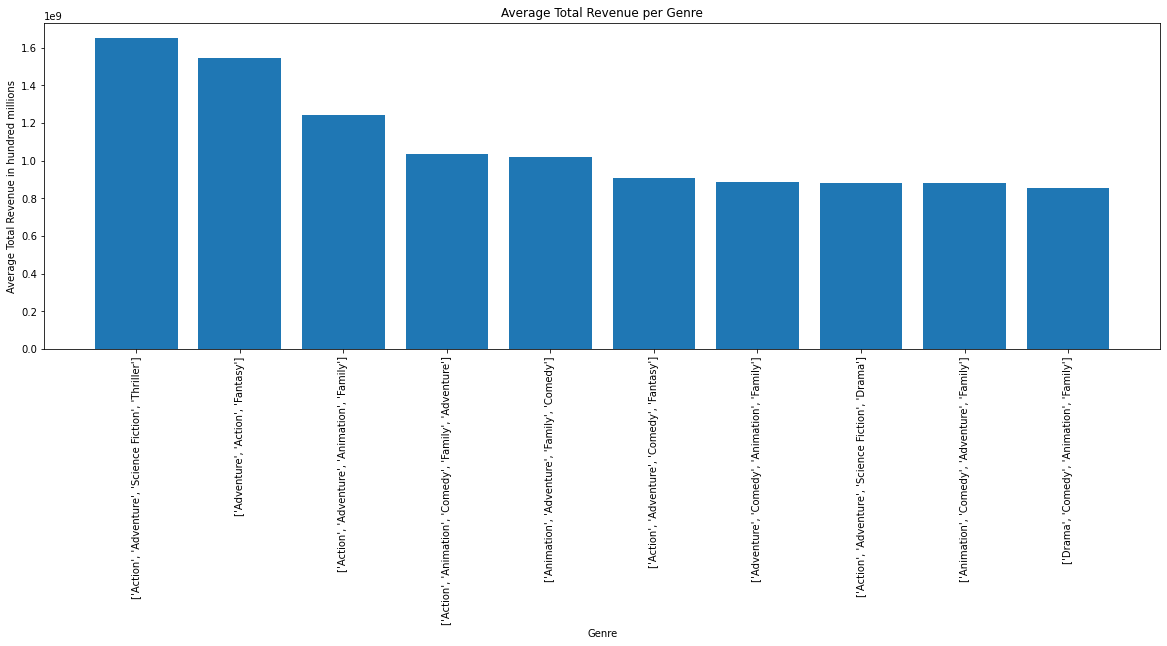

In [40]:
# Plot a bar graph of the data
plt.figure(figsize=(20, 6))
plt.bar(revenue_by_genre.index, revenue_by_genre.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average Total Revenue in hundred millions')
plt.title('Average Total Revenue per Genre')
plt.show()

I can conclude that most movies in the dataset are categorized across multiple genres. However, it appears that the top 10 highest grossing movie genres have elements of action and adventure across the board.

## Analysis by production budget

An important factor to consider in determining the success of a film in the box office is the production budget. It is argued that films that are more expensive to produce generate higher revenue. I will now explore whether there is any correlation between the production budget and the revenue earned from a film.

In [41]:
#find the mean and median production budget 
print(combined_df['production_budget'].mean())
print(combined_df['production_budget'].median())

51221990.88693957
30000000.0


The mean production budget is approximately 51 million while the median is 30 million.

In [42]:
revenue_by_budget = combined_df.loc[:, ('production_budget', 'worldwide_gross')]
revenue_by_budget.head(10)

,production_budget,worldwide_gross
0,165000000,494900000
1,170000000,621200000
2,160000000,835500000
3,69000000,543500000
4,260000000,586500000
5,155000000,418200000
6,110000000,177200000
7,150000000,319700000
8,40000000,224900000
9,210000000,322500000


### Correlation between production budget and gross revenue

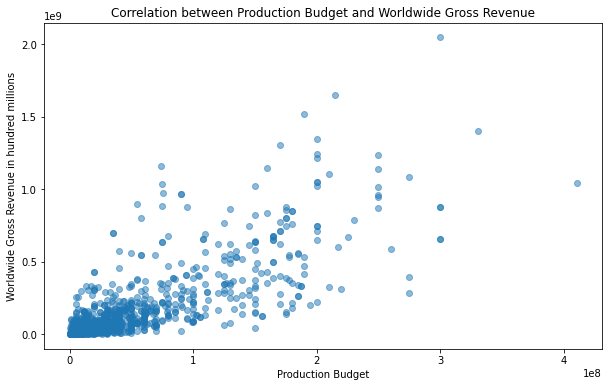

In [43]:
# create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(x=revenue_by_budget['production_budget'], y=revenue_by_budget['worldwide_gross'], alpha=0.5)

# set the x-axis label
plt.xlabel('Production Budget')

# set the y-axis label
plt.ylabel('Worldwide Gross Revenue in hundred millions')

# set the plot title
plt.title('Correlation between Production Budget and Worldwide Gross Revenue')

# show the plot
plt.show()

The scatterplot shows a positive linear relationship between the production budget and worldwide gross, which indicates that movies with higher production budgets tend to have higher worldwide grosses. However, there is also quite a bit of variability in the data, with some movies having high worldwide grosses despite relatively low production budgets, and vice versa.

In [44]:
# calculate the correlation
corr = revenue_by_budget['production_budget'].corr(revenue_by_budget['worldwide_gross'])

# print the correlation value
print(f"The correlation between production budget and worldwide gross is {corr:.2f}")

The correlation between production budget and worldwide gross is 0.78


The correlation coefficient of 0.78 implies that there exists a strong positive correlation between the production budget and worldwide gross of a movie.

### Analysis by studio

In [45]:
# Group the data by studio and calculate the average total revenue
revenue_by_studio = combined_df.groupby('studio')['worldwide_gross'].mean()
revenue_by_studio

studio
A24        2.286400e+07
ALP        2.900000e+06
ATO        2.300000e+06
Affirm     5.900000e+06
Alc        2.000000e+05
               ...     
W/Dim.     9.548000e+07
WB         2.385787e+08
WB (NL)    2.416737e+08
Wein.      6.653200e+07
Yash       8.750000e+06
Name: worldwide_gross, Length: 79, dtype: float64

In [46]:
# Sort the data in descending order based on the average total revenue
revenue_by_studio = revenue_by_studio.sort_values(ascending=False)
revenue_by_studio

studio
BV         4.939130e+08
P/DW       4.381000e+08
Fox        2.547108e+08
Sony       2.484018e+08
WB (NL)    2.416737e+08
               ...     
P4         1.000000e+06
NFC        1.000000e+06
TFA        4.000000e+05
Alc        2.000000e+05
KE         1.000000e+05
Name: worldwide_gross, Length: 79, dtype: float64

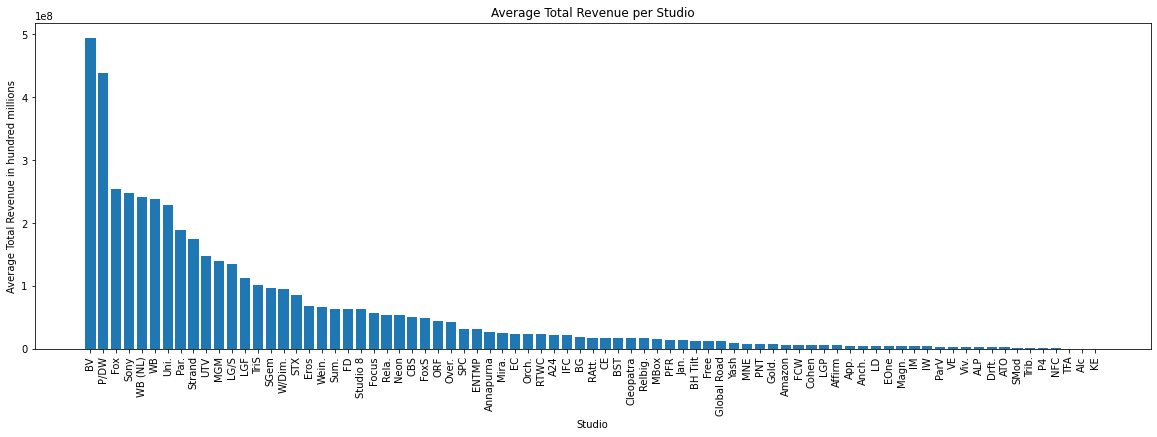

In [47]:
# Plot a bar graph of the data
plt.figure(figsize=(20, 6))
plt.bar(revenue_by_studio.index, revenue_by_studio.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Average Total Revenue in hundred millions')
plt.title('Average Total Revenue per Studio')
plt.show()

I can deduce that the top 10 studios that produced the highest grossing movies are Buena Vista(BV), Dream Works (P/DW) , Fox, Sony, WB NL(Warner Bros New Line), WB (Warner Bros), Universal(Uni), Paramount(Par), Strand, UTV, and MGM.

### Analysis by timing of release

Another important factor to consider in determinig the box office success of a movie is the release date, with particular focus on the month of release. Holiday months like November and December and summer months (May, June, July) are considered periods of peak audience for film attendance. Next, I will analyse observable trends on the financial performance of films across different months.

In [48]:
#extract the month from the release date column
combined_df['month'] = combined_df['release_date'].apply(lambda x: x.split('-')[1])
combined_df['month']

0       03
1       05
2       07
3       07
4       11
        ..
1021    05
1022    06
1023    06
1024    01
1025    02
Name: month, Length: 1026, dtype: object

In [50]:
# group the data by release_month and calculate the average revenue
revenue_by_timing = combined_df.groupby('month')['worldwide_gross'].mean()
revenue_by_timing

month
01    8.826230e+07
02    1.538125e+08
03    1.436685e+08
04    1.423000e+08
05    2.565379e+08
06    2.720430e+08
07    2.398253e+08
08    1.102636e+08
09    9.501042e+07
10    9.641739e+07
11    2.138368e+08
12    2.075983e+08
Name: worldwide_gross, dtype: float64

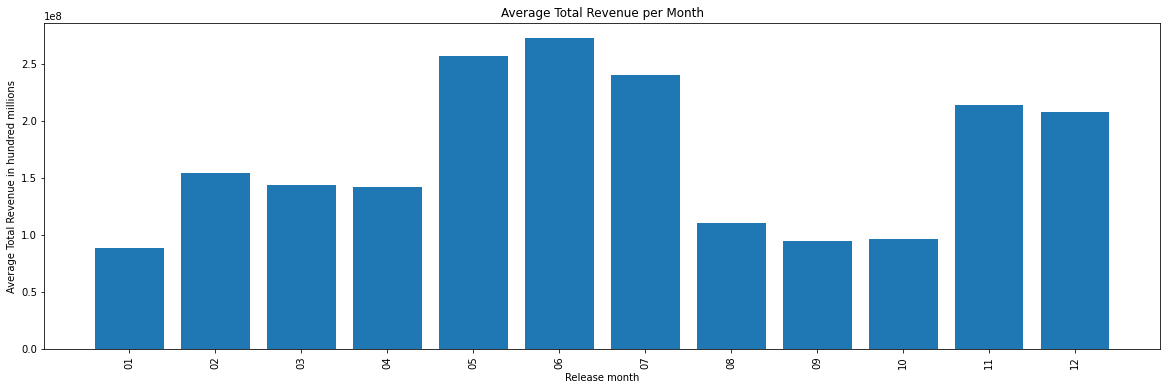

In [52]:
# Plot a bar graph of the data
plt.figure(figsize=(20, 6))
plt.bar(revenue_by_timing.index, revenue_by_timing.values)
plt.xticks(rotation=90)
plt.xlabel('Release month')
plt.ylabel('Average Total Revenue in hundred millions')
plt.title('Average Total Revenue per Month')
plt.show()

I can conclude that the highest grossing movies were released between May, June and July with the top grossing movies released in June, followed by May, then July. Moreover, many top grossing movies were also released in November and December. This supports the hypothesis that summer months and holiday seasons are periods of peak audience for film attendance as reflected by higher gross revenue in those months. 

## Summary

In this lab, I have analysed data from three different datasets on various elemnts of movies including the production budget, financial performance, genre performance, and timing of release to examine how each of these elements affect a movie's success in the box office.